# Car Evaluation Database 

This is a Car evaluvation Dataset downloaded from UCI webside for Data mining project purpose

Attribute Information:

Each attribute/feature described below:
#buying (buying price): vhigh (4), high (3), med (2), low (1)

#main (maintenance price): vhigh (4), high (3), med (2), low (1)

#doors (number of doors): 2, 3, 4, 5-more (5)

#persons (number of passengers fit in a car): 2, 4, more (6)

#lug_boot (size of luggage capacity): small (1), med (2), big (3)

#safety: low (1), med (2), high (3)

#Decision: unacc = unaccepted, acc = accepted, good = good, vgood = very good

In [1]:
import os
os.chdir(r'C:\Desktop\Data Science\dmasm')
os.getcwd()

'C:\\Desktop\\Data Science\\dmasm'

Changing Working Directery

In [2]:
# Removing/filtering unwanted warnings
import warnings
warnings.filterwarnings('ignore')

Above code use to remove unnecessary warnings through out the project

In [3]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243837 sha256=ae77a8564223d14ee8a6f71432b0e12b01499af805f5b97c8718dcf2663c4e01
  Stored in directory: C:\Users\nilak\AppData\Local\Temp\pip-ephem-wheel-cache-93c0sv6k\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


Imported required libraries for out project

In [4]:
df=pd.read_csv(r"C:\Desktop\Data Science\dmasm\PROJECT\CLASSIFICATION\car_evaluation.csv", header=None)

Read our datadet call car evaluvation by using pandas library

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Since there is no header in the dataset, let's give column names accordingly

In [6]:
df.columns= ['Price','Maintain', 'Doors','Capasity','Luggage_Boot','Safety','Decision']

Let's check the head of the data one more time

In [7]:
df.head()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Now its more clear to understand

In [8]:
df.tail()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety,Decision
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


this our last five rows of the data set

In [9]:
df.shape

(1728, 7)

We have 1728 rows and 7 coumns in the dataset

In [10]:
df.dtypes

Price           object
Maintain        object
Doors           object
Capasity        object
Luggage_Boot    object
Safety          object
Decision        object
dtype: object

datatype of the all column is object

# Now time to find the missing Values

In [11]:
df.isnull().sum()

Price           0
Maintain        0
Doors           0
Capasity        0
Luggage_Boot    0
Safety          0
Decision        0
dtype: int64

There is no missing values in the df. So good to go...

# Data Visualization

In [12]:
#Categorical variables and it's frequencies
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}
#Print frequencey of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible Decision
unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

Frequency of Categories for varible Price
low      432
med      432
vhigh    432
high     432
Name: Price, dtype: int64

Frequency of Categories for varible Doors
4        432
2        432
3        432
5more    432
Name: Doors, dtype: int64

Frequency of Categories for varible Capasity
4       576
more    576
2       576
Name: Capasity, dtype: int64

Frequency of Categories for varible Maintain
low      432
med      432
vhigh    432
high     432
Name: Maintain, dtype: int64

Frequency of Categories for varible Safety
low     576
med     576
high    576
Name: Safety, dtype: int64

Frequency of Categories for varible Luggage_Boot
big      576
small    576
med      576
Name: Luggage_Boot, dtype: int64


Here frequency giving  total number (mode) of each column observation

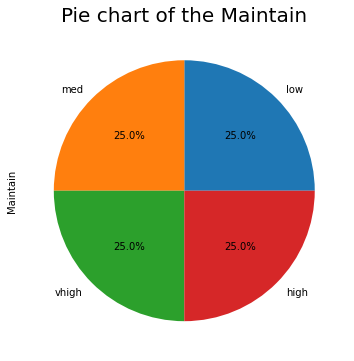

In [13]:
plt.figure(figsize=(6,6))
df.Maintain.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Maintain',{'fontsize':20})
plt.show()

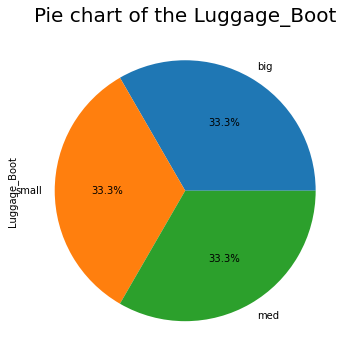

In [14]:
plt.figure(figsize=(6,6))
df.Luggage_Boot.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Luggage_Boot',{'fontsize':20})
plt.show()

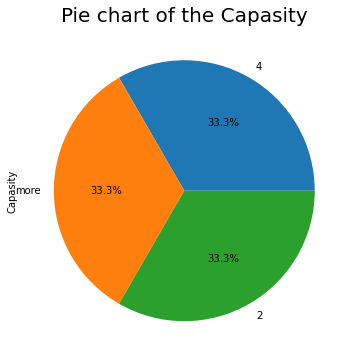

In [15]:
plt.figure(figsize=(6,6))
df.Capasity.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Capasity',{'fontsize':20})
plt.show()

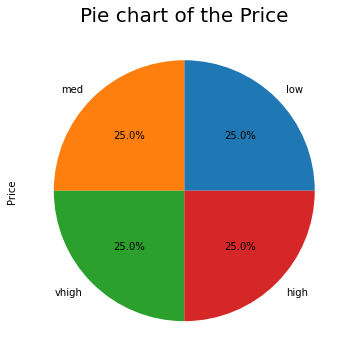

In [16]:
plt.figure(figsize=(6,6))
df.Price.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the Price',{'fontsize':20})
plt.show()

Text(0.5, 1, 'Bar chart for Number of Doors')

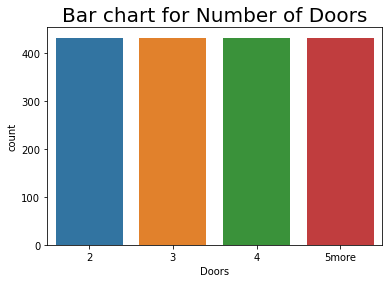

In [17]:
#Countplot
sns.countplot(df['Doors'])
plt.title("Bar chart for Number of Doors", y=1, fontdict={"fontsize": 20})

<AxesSubplot:xlabel='Decision', ylabel='count'>

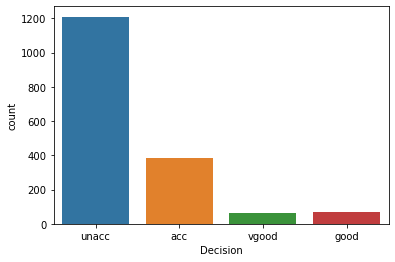

In [18]:
sns.countplot(df['Decision'])

visualization of column give idea that all columns except Decision column observations (values) are equal in count, but we can see unbalnced with larger values of unacc.

In [19]:
df.head()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


since our all datas are categorical we need encording for further 

# Encoding

In [20]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [21]:
# Encoding the variables with ordinal encoding
ce_ord = ce.OrdinalEncoder(cols=['Price','Maintain','Doors','Capasity','Luggage_Boot','Safety','Decision'])
df=ce_ord.fit_transform(df)

In [22]:
df.head()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety,Decision
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


<AxesSubplot:>

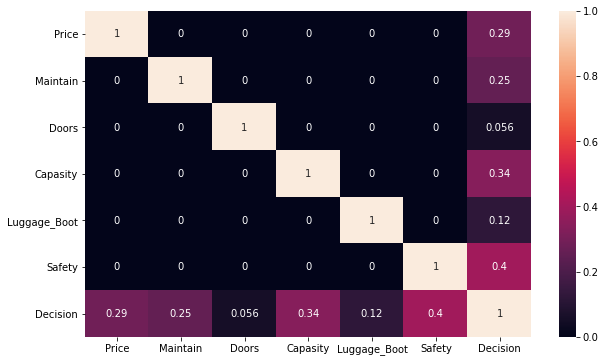

In [23]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

I can see that most of the columns shows very weak correlation with 'Decision'. 
But Safety and Capasity column is showning a weak relationship with 'Decision'. 
capare to other columns.

#spliting Data Test and Feature Engieering

In [24]:
#Extract dependent and independent variables
X = df.iloc[:,df.columns!='Decision'] #data or Features
Y = df.iloc[:,df.columns=='Decision'] #Target or Labe

X is the datframe containing Features(input data) and Y is the series which is the output going to be predicted

In [25]:
#shuffle the dataset for proper sampling
X= X.sample(frac = 1, random_state=1)
Y= Y.sample(frac = 1, random_state=1)

In [26]:
X.head()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety
1233,3,4,2,3,1,1
592,2,2,2,3,3,2
625,2,2,4,1,2,2
1546,4,3,2,1,3,2
730,2,3,4,1,1,2


In [27]:
Y.head()

,Decision
1233,1
592,2
625,1
1546,1
730,1


In [28]:
#Ensuring that all variables are numeric now
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1728.0,2.5,1.118358,1.0,1.75,2.5,3.25,4.0
Maintain,1728.0,2.5,1.118358,1.0,1.75,2.5,3.25,4.0
Doors,1728.0,2.5,1.118358,1.0,1.75,2.5,3.25,4.0
Capasity,1728.0,2.0,0.816733,1.0,1.00,2.0,3.00,3.0
Luggage_Boot,1728.0,2.0,0.816733,1.0,1.00,2.0,3.00,3.0
Safety,1728.0,2.0,0.816733,1.0,1.00,2.0,3.00,3.0


Since all values in small range, no need for feature scalling

# Splitting Data set into Train and Test sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.25)

75% of data splited as Train and 25% of data goes to test set

In [30]:
X_test.head()

,Price,Maintain,Doors,Capasity,Luggage_Boot,Safety
1686,4,4,3,2,2,1
579,2,2,2,2,2,1
467,2,1,2,1,3,3
359,1,4,2,1,3,3
1603,4,3,4,2,1,2


In [31]:
Y_test.head()

,Decision
1686,1
579,1
467,1
359,1
1603,2


# Modeling

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
#Defining Model
model = LogisticRegression(solver='sag',multi_class='multinomial')
model.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [34]:
cross_val_score(LogisticRegression(),X,Y,cv=4).mean()

0.8275462962962963

Score is good.So model is effective. 

In [35]:
# Predicting the values for x-test
Y_pred = model.predict(X_test)

In [36]:
#finding the training and testing accuracy
print ("Training Accuracy: ",model.score(X_train,Y_train))
print ("Testing Accuracy: ",model.score(X_test,Y_test))

Training Accuracy:  0.8240740740740741
Testing Accuracy:  0.8240740740740741


the training accuracy is the accuracy of the model apply on the training data, which is 0.82 and testing Accuracy is the accuracy for the testing data, which is 0.81.

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[282,   6,   3,   3],
       [ 47,  58,   0,   1],
       [  0,   5,  10,   2],
       [  3,   6,   0,   6]], dtype=int64)

In [38]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.85      0.96      0.90       294
           2       0.77      0.55      0.64       106
           3       0.77      0.59      0.67        17
           4       0.50      0.40      0.44        15

    accuracy                           0.82       432
   macro avg       0.72      0.62      0.66       432
weighted avg       0.82      0.82      0.81       432



In [39]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [40]:
accuracy_score(Y_test,Y_pred)

0.8240740740740741

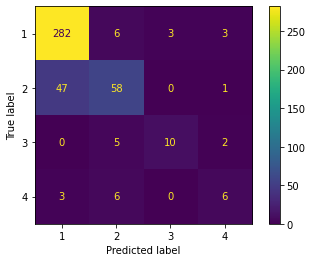

In [41]:
plot_confusion_matrix(model,X_test,Y_test)

this grapg first raw showing, for an example, when it is  truly 1, how often model can predict 1 is 274,and rest of the numbers (10,0,2) will predict rest of the values(2,3, and 4).same interpret apply to rest of the row.

In [42]:
#multi_Class classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

In [43]:
#fit model
clas=OneVsRestClassifier(LogisticRegression())
clas.fit(X_train,Y_train)
pred=clas.predict(X_test)
pred_prob=clas.predict_proba(X_test)

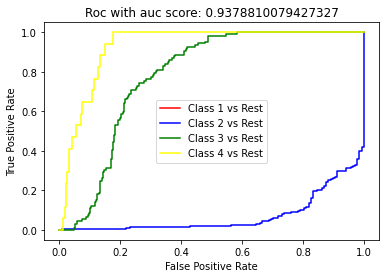

In [44]:
fpr={}
tpr={}
thresh={}
n_class=4
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)

#plotting
plt.plot(fpr[0], tpr[0], linestyle='-', color='red', label="Class 1 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle='-', color='blue', label="Class 2 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle='-', color='green', label="Class 3 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle='-', color='yellow', label="Class 4 vs Rest")
plt.title("Roc curve for multiclass")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('Roc with auc score: {}'.format(roc_auc_score(Y_test,clas.predict_proba(X_test),multi_class='ovr')))
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(Y_test,y_pred_proba,multi_class="ovr")


0.9463651522038702

AUC measure of the ability of the classifier to distinguish between classes and  higher AUC, better the performance of the model and here I got AUC score 0.94 and this consider it is good model.

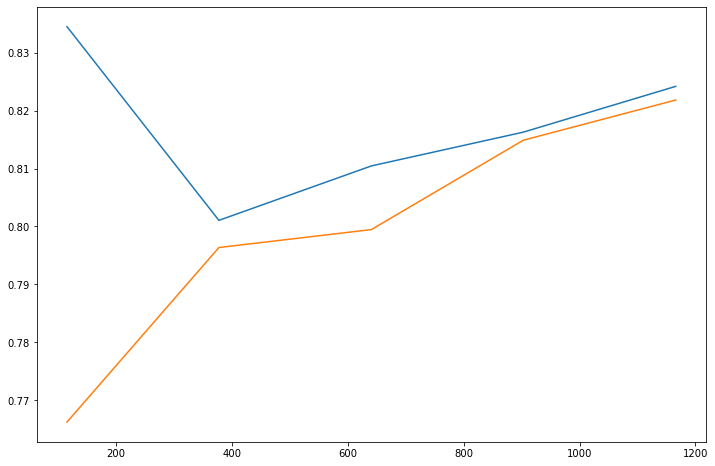

In [46]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
lc=learning_curve(model,X_train,Y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

From above graph, with the increasing number of samples, train accuracy is droped and then increasing and test score is increasing

Conclusion:
    K-fold score is 0.9463651522038702
    Training Accuracy:  0.8240740740740741
    Testing Accuracy:  0.8125
    AUC score: 0.93788, 
As per this result lostic regression model is fit well and good to use. 